In [1]:
#Перед вами данные взаимодействий с рекламными объявлениями на некоторой площадке за 6 дней. 
#И таблица с характеристиками рекламных клиентов (тех, кто разместил эти объявления).

#Задачи
#Разберемся с распределением количества показов и кликов. Посчитайте среднее количество показов и среднее количество кликов
#на объявления за весь период (округлите до целых).
#Нарисуйте график распределения показов на объявление за весь период.
#Давайте посчитаем скользящее среднее показов с окном 2. Какое значение скользящего среднего получим за 6 апреля 2019 года 
#(ответ округлите до целых)?
#Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения 
#арифметического среднего по дням и скользящего среднего количества показов. В какой день наблюдается наибольшая разница 
#по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем. 
#*Напишите функцию, которая найдет проблемное объявление (с наибольшим/наименьшим количеством показов) в день, 
#в который была замечена самая большая по модулю аномалия. 
#Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного клиента
#и первым запуском рекламного объявления этим клиентом.
#Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней.
#Ответ дайте в процентах и округлите до сотых. (Фильтровать нужно по значению в формате pd.Timedelta(365, unit='d'))
#Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. 
#Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней).
#Список промежутков для метода pd.cut – [0, 30, 90, 180, 365]
#А теперь – выведем на интерактивный график эти категории с количеством уникальных клиентов в них.

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [216]:
df1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-juhimenko/shared/homeworks/python_ds_miniprojects/6/ads_data.csv')

In [217]:
df2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-juhimenko/shared/homeworks/python_ds_miniprojects/6/ads_clients_data.csv')

In [218]:
df1.date = pd.to_datetime(df1.date, format = '%Y-%m-%d')

In [219]:
df1.time = pd.to_datetime(df1.time, format = '%Y-%m-%d %H:%M:%S')

In [25]:
df1.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [34]:
df_event = df1.groupby(['ad_id', 'event'], as_index = [False, False]).agg({'event':'count'}).rename(columns={'event': 'Count'}).reset_index()
df_event.head()

,ad_id,event,Count
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1


In [103]:
df_pivot = df_event.pivot(index = 'ad_id', columns = 'event', values = 'Count')
df_pivot = df_pivot.fillna(0).reset_index()

In [104]:
df_pivot.view = df_pivot.view.astype('int')
df_pivot.click = df_pivot.click.astype('int')

In [131]:
df_v = df_pivot[df_pivot.view > 0]

In [132]:
df_v['view_lg'] = np.log(df_v.view)
df_v.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


event,ad_id,click,view,view_lg
0,2,1,101,4.615121
1,3,3,184,5.214936
2,1902,1,41,3.713572
3,2064,0,35,3.555348
4,2132,1,58,4.060443


In [120]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


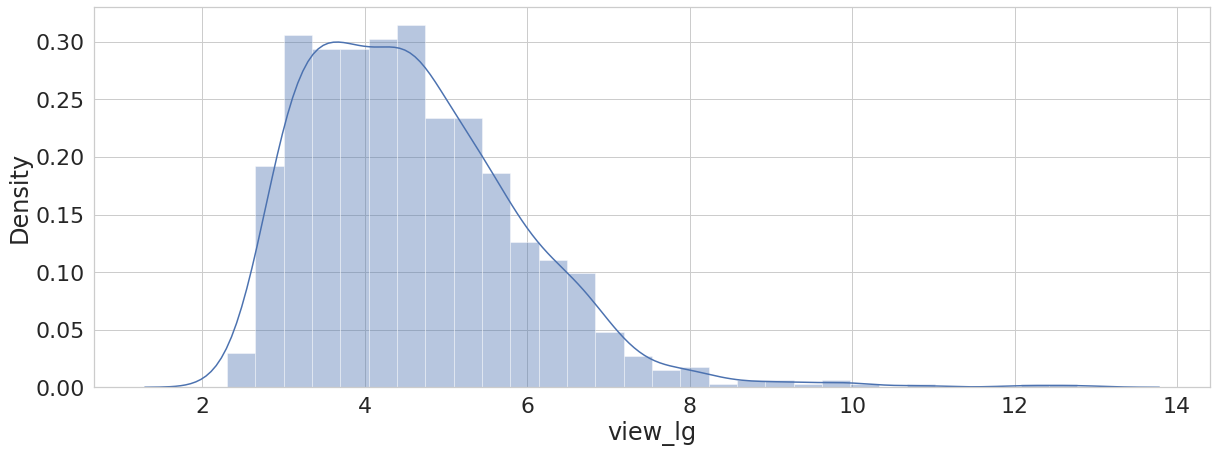

In [130]:
sns.distplot(df_v.view_lg)

In [134]:
df1.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [160]:
df_group = df1.query('event == "view"').groupby(['ad_id','date', 'event'], as_index = [False, False, False]) \
    .agg({'event': 'count'}) \
    .rename(columns = {'event': 'Count'}).reset_index()

In [161]:
df_group.head()

,ad_id,date,event,Count
0,2,2019-04-01,view,83
1,2,2019-04-02,view,18
2,3,2019-04-01,view,158
3,3,2019-04-02,view,26
4,1902,2019-04-03,view,34


In [176]:
dff1 = df_group.groupby('date').agg({'Count': 'mean'}).round(0)

In [177]:
dff2 = df_group.groupby('date').agg({'Count': 'mean'}).rolling(2).mean().round(0)

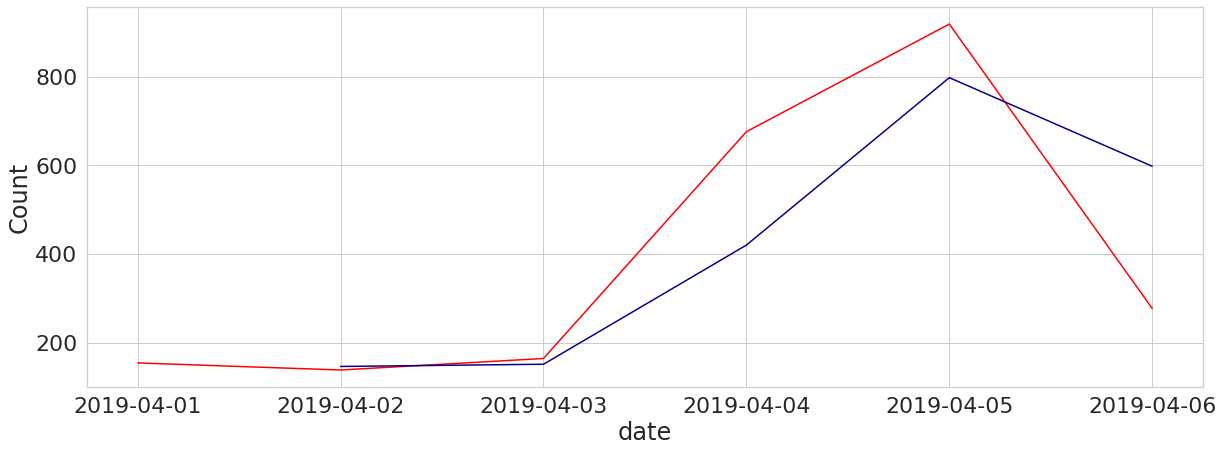

In [186]:
sns.lineplot(data = dff1, y = 'Count', x =dff1.index, color = 'red')
sns.lineplot(data = dff2, y = 'Count', x =dff2.index, color = 'darkblue')


In [185]:
dff1 - dff2

,Count
date,
2019-04-01,NaN
2019-04-02,-8.0
2019-04-03,13.0
2019-04-04,256.0
2019-04-05,121.0
2019-04-06,-321.0


In [220]:
df1.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [221]:
df2.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [222]:
df2.date = pd.to_datetime(df2.date, format = '%Y-%m-%d')
df1 = df1.rename(columns = {'date':'date_rekl'})

In [197]:
df2.dtypes

date_rekl          datetime64[ns]
client_union_id             int64
community_id                int64
create_date                object
dtype: object

In [223]:
df_b = df2.merge(df1, on = ['client_union_id'])
df_b.create_date = pd.to_datetime(df_b.create_date, format = '%Y-%m-%d')

In [224]:
df_b = df_b.assign(date_dif = df_b.date_rekl - df_b.create_date)
df_b.head()

,date,client_union_id,community_id,create_date,date_rekl,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_dif
0,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:08:51,view,android,3,1,CPC,46.7,0,45035,98 days
1,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:09:36,view,ios,3,1,CPC,46.7,0,45035,98 days
2,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:30,view,ios,3,1,CPC,46.7,0,45035,98 days
3,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:58,view,android,3,1,CPC,46.7,0,45035,98 days
4,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:51:54,view,android,3,1,CPC,46.7,0,45035,98 days


In [226]:
df_b.groupby('client_union_id').agg({'date_dif': 'min'}).mean()

date_dif   124 days 09:04:43.532219570
dtype: timedelta64[ns]

In [ ]:
#Вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.

#Конверсия – отношение числа клиентов, которые совершили целевое действие (создали рекламу), к общему числу клиентов.

In [240]:
df7 = df_b.groupby('client_union_id', as_index = False).agg({'date_dif': 'min'})
df7.head()

,client_union_id,date_dif
0,1,98 days
1,9,114 days
2,13,66 days
3,16,105 days
4,20,32 days


In [263]:
df7.describe()

,client_union_id,date_dif
count,838.000000,838
mean,47921.434368,124 days 09:04:43.532219570
std,42915.267571,59 days 08:03:36.669339745
min,1.000000,26 days 00:00:00
25%,21301.250000,73 days 06:00:00
50%,28913.500000,119 days 00:00:00
75%,105267.500000,166 days 18:00:00
max,122078.000000,251 days 00:00:00


In [262]:
conversiya = round(df7.client_union_id.count()/df2.client_union_id.nunique()*100,2)
conversiya

0.69

In [ ]:
#Давайте разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.

In [333]:
df_clients = df7

In [334]:
df_clients['cutting'] = pd.cut(df_clients.date_dif, pd.to_timedelta(['-1 days', '30 days', '90 days', '180 days', '365 days']), 
                               labels = ['0-30', '30-90', '90-180', '180-365'])

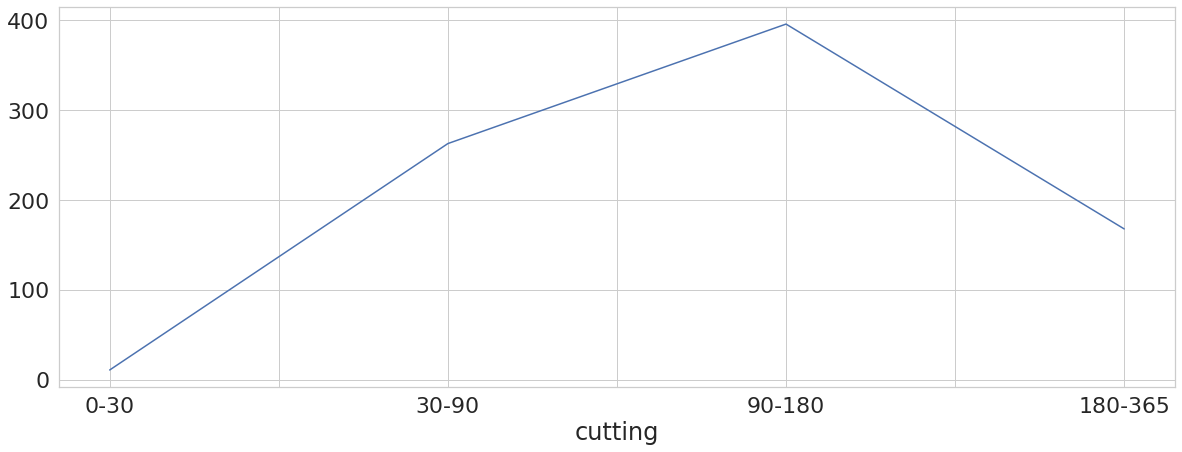

In [344]:
df_clients.groupby('cutting').client_union_id.count().plot()